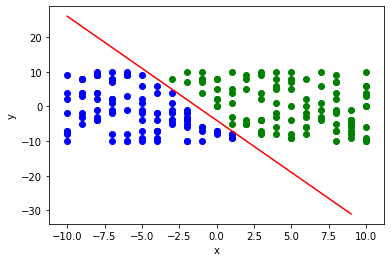

In [5]:
import matplotlib.pyplot as plt
import random as rand
import numpy as np
def generate_dataset(k0, k1):
    """
    Parameters
    ----------
    k0 : integer, number of samples for class 0
    k1 : integer, number of samples for class 1
    
    Returns
    -------
    X : array, shape (m, d), dimension numpy array where m is the number of 
    samples and d is the number of features 

    Y : array, (m, 1), dimension vector where m is the number of samples
    
    """
    m = k0+k1 # total number of points
    # co-ordinators of points
    a = rand.randint(1,10)  
    b = rand.randint(1,10) 
    c = rand.randint(1,10)
    # shape of X
    d = 2
   
    X = []
    y =[] 
    k0_l = [] #
    k1_l = []
    s = 0
    # collecting points for the k0 set
    while s<k0:
        
        rx = rand.randint(-10,10)
        ry = rand.randint(-10,10)
        if  (rx*a+ry*b+c) < 0:
            X.append([rx,ry])
            y.append([-1])
            k0_l.append([rx,ry])
            s+=1
    s=0
    # collecting points for the k1 set
    while s<k1:
        rx = rand.randint(-10,10)#(rand.randint(1,100),rand.randint(1,100))
        ry = rand.randint(-10,10)
        if  (rx*a+ry*b+c)  > 0:
            X.append([rx,ry])
            y.append([1])
            k1_l.append([rx,ry])
            s+=1
        
    X = np.asarray(X)
    y = np.asarray(y)
    k0_l = np.asarray(k0_l)
    k1_l = np.asarray(k1_l)
    j = 0
    points_x = []
    points_y = []
    for i in range(-10,10):
        points_x.append(i)
        points_y.append((-(c/b)-((a*i)/b))) #obtaining y values by substituting x in the ax+by+c=0 format
    #plot the points
    plt.plot(points_x,points_y, 'r-')
    plt.scatter(k0_l[:,0],k0_l[:,1],color='blue')
    plt.scatter(k1_l[:,0],k1_l[:,1],color='green')
    plt.xlabel("x")
    plt.ylabel("y")
    return X,y

X,y= generate_dataset(100, 100)


The goal here is to correctly find out the coefficients  𝑎 ,  𝑏 , and  𝑐 , represented below as  𝐰  which is a vector. The algorithm to find it is a simple iterative process:

Randomly choose a  𝐰  to begin with.

Keep on adjusting the value of  𝐰  as follows until all data samples are correctly classified:

Randomly choose a sample from the dataset without replacement and see if it is correctly classified. If yes, move on to another sample.

If not, then update the weights as  𝐰𝑡+1=𝐰𝑡+𝑦⋅𝐱  and go back to the previous step (of randomly chosing a sample)

𝐰𝑡+1  is value of  𝐰  at iteration  𝑡+1 
𝐰𝑡  is value of  𝐰  at iteration  𝑡 
𝑦  is the class label for the sample under consideration
𝐱  is the data-point under consideration
Write a function that implements this learning algorithm. The input to the function is going to be a dataset represented by the input variable  𝑋  and the target variable  𝑦 . The output of the function should be the chosen  𝐰 

 The new coefficients of the line are [[26.  8. 17.]]


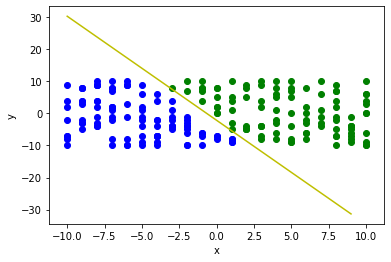

In [7]:
import random
            
def fit_line(X,y):
    
    """
    This method learns the data set and generates co-efficients to provide us 
    with the slope and the intercept of the line that should seperate the data
    
    Parameters
    ----------
     X : array, shape (m, d), dimension numpy array where m is the number of 
    samples and d is the number of features 

    Y : array, (m, 1), dimension vector where m is the number of samples
    
    -----------
    Returns : the coefficients for the binary classification
    """
    # intercept fit on the X array
    ones = np.ones((X.shape[0],1))
    X = np.c_[X,ones]

    randomList =  random.sample(range(0,X.shape[0]), X.shape[0])
    track_array = []
    w = np.random.randint(2,size=(1,3))
    """
    The steps provided in the algorithm above are performed here.
    """
    while(True):
        if len(track_array) == X.shape[0]:
            break
        randomInt = random.choice(randomList)
        if randomInt not in track_array: 
            X_val = X[randomInt]
            y_val = y[randomInt]
            y_predicted = X_val[0]*w[0][0]+w[0][1]*X_val[1]+w[0][2]
            if y_predicted < 0:
                if y_val == [-1]:
                    track_array.append(randomInt)
                    
                else:
                    updated_val = X_val * y_val
                    w = w + updated_val
                    # if the prediction goes wrong, the points that were already classified must be dicarded.
                    track_array.clear()
            else:
                if y_val == [1]:
                    track_array.append(randomInt)
                else:
                    updated_val = X_val * y_val
                    w = w + updated_val
                    # if the prediction goes wrong, the points that were already classified must be dicarded.
                    track_array.clear()

    return w
#output 
w = fit_line(X,y)
points_x1 = []
points_y1 = []
k0_list = []
k1_list = []
# plot the original points and the learned line  
for i in range(X.shape[0]):
    if y[i] == -1:
        k0_list.append(list(X[i]))
    else:
        k1_list.append(list(X[i]))
k0_list = np.asarray(k0_list)
k1_list = np.asarray(k1_list)
# generating points that fit the equation with the above obtained slope and intercept
for i in range(-10,10):
        points_x1.append(i)
        points_y1.append((-(w[0][2]/w[0][1])-((w[0][0]*i)/w[0][1])))
plt.plot(points_x1,points_y1, 'y-')
plt.scatter(k0_list[:,0],k0_list[:,1],color="blue")
plt.scatter(k1_list[:,0],k1_list[:,1],color="green")
plt.xlabel("x")
plt.ylabel("y")
print(" The new coefficients of the line are",w)
